## 7. EDOs de 1ª ordem: Métodos de Taylor e Runge-Kutta 

### 7.1 Introdução

Consideremos o Problema de Valor Inicial (PVI) descrito por
$$\begin{cases} 
   y' = f(x,y) \\
   y(x_0)=y_0
  \end{cases}$$


Supondo que a solução $y(x)$ do PVI possui todas as derivadas contínuas no intervalo $[a,b]$ que contém os pontos de discretização $x_0$,$x_1$,...,$x_n$ , o desenvolvimento em série de Taylor da função $y(x)$ em torno do ponto $x_n$ é dado por

$$ y(x) = y(x_n) + y'(x_n)(x−x_n) + y''(x_n)\frac{(x-x_n)^2}{2!}+...$$
$$...+y^{(p)}(x_n)\frac{(x-x_n)^p}{p!}+y^{(p+1)}(\xi)\frac{(x-\xi)^{p+1}}{(p+1)!}$$

com $ x_0<\xi<x$. 

Tomando $x = x_n + h$, denotado por $x_n+1$ , assim, $h = x_n+1 − x_n$ e temos:

$$ y(x) = y(x_n) + y'(x_n)h + y''(x_n)\frac{h^2}{2!}+...$$
$$...+y^{(p)}(x_n)\frac{h^p}{p!}+y^{(p+1)}(\xi)\frac{(x-\xi)^{p+1}}{(p+1)!}$$

Se truncarmos a série de Taylor no p-ésimo termo, temos:

$$ y(x) = y(x_n) + y'(x_n)h + y''(x_n)\frac{h^2}{2!}+...+y^{(p)}(x_n)\frac{h^p}{p!}$$

com um **erro de truncamento** dado pelo último termo da série de Taylor

$$e(x_n)=y^{(p+1)}(\xi)\frac{(x-\xi)^{p+1}}{(p+1)!}$$


Se a função $y(x)$ possui a derivada de ordem $(p + 1)$ contínua no intervalo $[a,b]$, então existe $M = max \left\{ \left|y^{(p+1)}(x)\right|, x \in [a,b] \right\}$, e temos uma estimativa para o erro dada por um limitante superior, de ordem $(p + 1)$, como segue:

$$ |E| \leq \frac{h^{p+1}}{(p+1)!}M$$

Assim, usando a série de Taylor, podemos calcular aproximações para $y(x)$ da seguinte forma:

$$ y(x_{n+1}) = y_n + y'_nh + y''_n\frac{h^2}{2!}+...+y^{(p)}_n\frac{h^p}{p!}$$

onde 

$ y'_n = f(x_n, y_n)$

$ y''_n = f_x(x_n, y_n) + f_y(x_n, y_n)y'_n$

$y'''_n = f_{xx}(x_n, y_n) + 2f_{xy}(x_n, y_n)f(x_n, y_n) + f^2(x_n, y_n)f_{yy}(x_n, y_n) + f^2_y(x_n, y_n)f(x_n, y_n)$

$\vdots $

### Método de Taylor de ordem $p=2$

**Exemplo 7.1:** Use o método de Taylor de ordem 2 para integrar numericamente a equação:

$$ \begin {cases}
   \frac{dy}{dx} = x-y+2 \\
    y(0)=2
    \end{cases}$$

de $x = 0$ a $x = 1$ com $N = 5$ subintervalos. Compare os valores e plote o resultado considerando a solução exata $y(x)=e^x - x + 1$.

*Solução:*

Precisamos usar a fórmula de recorrência

$$ y_{n+1} = y_n + y'_nh + y''_n\frac{h^2}{2!} $$

em que

$$ y' = x - y + 2 $$

$$ y'' = 1-y' = 1-(x-y+2) = -x+y-1$$

então

$$ y_{n+1} = y_n + (x_n - y_n + 2)h + (-x_n+y_n-1) \frac{h^2}{2!} $$

Y 1 = 2.02
Y 2 = 2.0724
Y 3 = 2.1513679999999997
Y 4 = 2.2521217599999996
Y 5 = 2.3707398431999995
[0.  0.2 0.4 0.6 0.8 1. ]
Sol. aprox.: [2.     2.02   2.0724 2.1514 2.2521 2.3707]
Sol. exata.: [2.     2.0187 2.0703 2.1488 2.2493 2.3679]


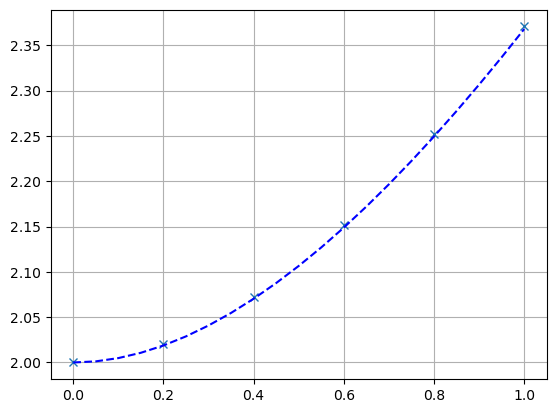

In [1]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x,y: x-y+2
df = lambda x,y: -x+y-1

x0 = 0
xn = 1
n = 5 #subintervalos

X = np.linspace(x0,xn,n+1)
Y = np.zeros(n+1)
Y[0] = 2
h=(xn-x0)/n
for i in range(n):
    Y[i+1] = Y[i] + h*f(X[i],Y[i]) + 0.5*(h**2)*df(X[i],Y[i])
    print ("Y",i+1,"=",Y[i+1])
print (X)
print ('Sol. aprox.:',np.round(Y,4))
print ('Sol. exata.:',np.round(np.exp(-X) + X + 1, 4))

Xe = np.linspace(X[0],X[-1],21)
Ye = np.exp(-Xe) + Xe + 1


# plotando
plt.plot(X, Y, "x",Xe, Ye, 'b--')
plt.grid()
plt.show()

### 7.3 Métodos de Runge-Kutta 

O método de Runge-Kutta mais simples é o de ordem 1. Neste caso, o método coincide com o método de Euler, isto é, o método de Taylor de ordem 1, apresentado na seção 11.5. 

Assim, considerando, novamente, o Problema de Valor Inicial (PVI) dado por

$$\begin{cases} 
   y' = f(x,y) \\
   y(x_0)=y_0
  \end{cases}$$

tem-se o Método de Runge-Kutta como é apresentado a seguir.


### Método de Runge-Kutta de ordem 1

O processo iterativo será dado por:

$$ y_{n+1} =y_n + hk_1 $$ 
com
$$ k_1 = f(x_n, y_n)$$

(Ver exempos de seção 8.2).

### Método de Runge-Kutta de ordem 2

O processo iterativo será dado por:

$$ y_{n+1} =y_n + \frac{h}{2}(k_1+k_2) $$ 

com
$$ k_1 = f(x_n, y_n)$$

$$ k_2 = f(x_n+h, y_n+hk_1) $$


o qual também é conhecido como **método de Euler aperfeiçoado**.

A figura abaixo ilustra uma  interpretação gráfica do método.

<img src="https://github.com/tiagoburiol/NUMETHODS/raw/master/8_SOLUCAO_NUMERICA_DE_EDOs/imagens/runge_kutta_ordem_2.png" width="600">

**Exemplo 1.11:** Usando o método de Euler aperfeiçoado, calcule a solução do PVI definido por:

$$\begin{cases} 
   y' = f(x,y)=x-y+2 \\
   y(x_0)= y(0) = 2
  \end{cases}$$

com $x \in [a,b] = [0,1]$ e $N = 5$. 

A solução exata é $y(x) = e^{-x}+x+1$.

[0.  0.2 0.4 0.6 0.8 1. ]
[2.0, 2.02, 2.0724, 2.151368, 2.25212176, 2.3707398432]
[2.         2.01873075 2.07032005 2.14881164 2.24932896 2.36787944]


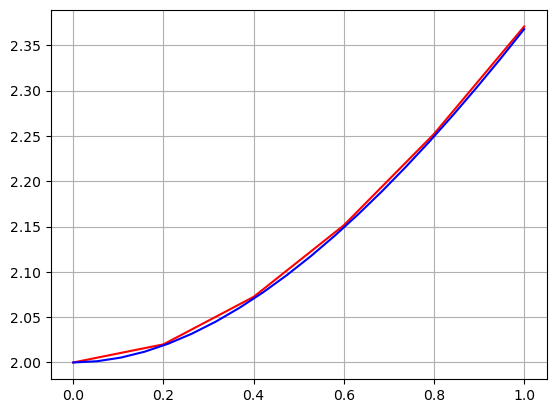

In [2]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x,y: x-y+2
x0 = 0.0
y0 = 2.0
N = 5

a = 0.0
b = 1.0
X = np.linspace(a,b,N+1)
print (X)
Y = [y0]

h = (b-a)/N

for n in range(len(X)-1):
    k1 = f(X[n], Y[n])
    k2 = f(X[n]+h, Y[n]+h*k1)
    Y.append(Y[n]+0.5*h*(k1+k2))
print (Y)  

s = lambda x: np.exp(-x) + x + 1
Xe = np.linspace(a,b, 20)
Ye = s(Xe)
print (s(X))

# plota
plt.plot(X, Y, "r-", Xe, Ye, "b-")
plt.grid()
plt.show()

**Exemplo 1.12:** Usando o método de Euler modificado, calcule a solução do PVI definido por:

$$\begin{cases} 
   y' = f(x,y)=x-y+2 \\
   y(x_0)= y(0) = 2
  \end{cases}$$

com $x \in [a,b] = [0,1]$ e $h=0.2$. 

A solução exata é $y(x) = e^{-x}+x+1$.

[0.  0.2 0.4 0.6 0.8 1. ]
[2.     2.02   2.0724 2.1514 2.2521 2.3707]
[2.     2.0187 2.0703 2.1488 2.2493 2.3679]


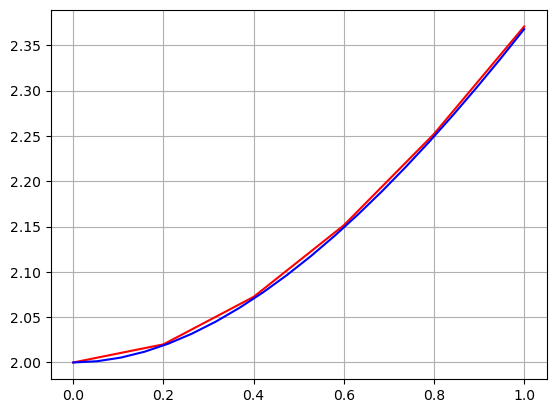

In [3]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x,y: x-y+2
x0 = 0.0
y0 = 2.0
N = 5

a = 0.0
b = 1.0
X = np.linspace(a,b,N+1)
print (X)
Y = [y0]

h = (b-a)/N

for n in range(len(X)-1):
    k1 = f(X[n], Y[n])
    Y.append(Y[n] + h * f(X[n]+0.5*h, Y[n]+0.5*h*k1))
    #print (k1,Y[-1])
print (np.round(Y,4))

s = lambda x: np.exp(-x) + x + 1
Xe = np.linspace(a,b, 20)
Ye = s(Xe)
print (np.round(s(X),4))

# plota
plt.plot(X, Y, "r-", Xe, Ye, "b-")
plt.grid()
plt.show()

### Método de Runge-Kutta de ordem 3

O método de Runge-Kutta ordem 3 é dado po

$$ y_{n+1} =y_n + \frac{h}{9}(2k_1 + 3k_2 + 4k_3) $$ 

com

$$ k_1 = f(x_n , y_n)$$

$$ k_2 = f(x_n + \frac{1}{2}h, y_n + \frac{1}{2}hk_1) $$

$$ k_3 = f(x_n + \frac{3}{4}h, y_n + \frac{3}{4}hk_2) $$

**Exemplo 1.13:** Usando o método de Runge-Kutta de ordem 3, calcule a solução do PVI definido por:

$$\begin{cases} 
   y' = f(x,y)=x-y+2 \\
   y(x_0)= y(0) = 2
  \end{cases}$$

com $x \in [a,b] = [0,1]$ e $h=0.2$. 

A solução exata é $y(x) = e^{-x}+x+1$.

[0.  0.2 0.4 0.6 0.8 1. ]
[2.     2.0187 2.0702 2.1487 2.2492 2.3677]


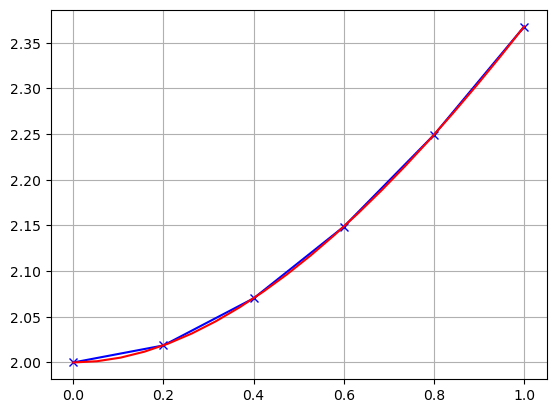

[0.  0.2 0.4 0.6 0.8 1. ]
[2.     2.0187 2.0702 2.1487 2.2492 2.3677]


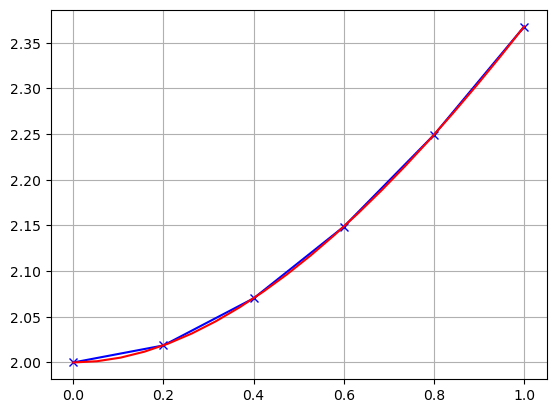

In [4]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x,y: x-y+2
x0 = 0.0
y0 = 2.0
N = 5

a = 0.0
b = 1.0
X = np.linspace(a,b,N+1)
print (X)
Y = [y0]

h = (b-a)/N
for n in range(len(X)-1):
    k1 = f(X[n], Y[n])
    k2 = f(X[n]+0.5*h, Y[n]+0.5*h*k1)
    k3 = f(X[n]+0.75*h, Y[n]+0.75*h*k2)
    Y.append(Y[n] + (h/9) * (2*k1 + 3*k2 + 4*k3))
    #print (k1,Y[-1])
print (np.round(Y,4))

# plota
plt.plot(X, Y, "xb-", Xe, Ye, "r-")
plt.grid()
plt.show()
import numpy as np
import matplotlib.pyplot as plt

f = lambda x,y: x-y+2
x0 = 0.0
y0 = 2.0
N = 5

a = 0.0
b = 1.0
X = np.linspace(a,b,N+1)
print (X)
Y = [y0]

h = (b-a)/N
for n in range(len(X)-1):
    k1 = f(X[n], Y[n])
    k2 = f(X[n]+0.5*h, Y[n]+0.5*h*k1)
    k3 = f(X[n]+0.75*h, Y[n]+0.75*h*k2)
    Y.append(Y[n] + (h/9) * (2*k1 + 3*k2 + 4*k3))
    #print (k1,Y[-1])
print (np.round(Y,4))

# plota
plt.plot(X, Y, "xb-", Xe, Ye, "r-")
plt.grid()
plt.show()

### Método de Runge-Kutta de ordem 4

O método de Runge-Kutta ordem 4 é dado po

$$ y_{n+1} =y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 +k4) $$ 

com

$$ k_1 = f(x_n , y_n)$$

$$ k_2 = f(x_n + \frac{1}{2}h, y_n + \frac{1}{2}hk_1) $$

$$ k_3 = f(x_n + \frac{1}{2}h, y_n + \frac{1}{2}hk_2) $$

$$ k_4 = f(x_n + h, y_n + hk_3) $$

**Exemplo 1.14:** Usando o método de Runge-Kutta de ordem 4, calcule a solução do PVI definido por:

$$\begin{cases} 
   y' = f(x,y)=x-y+2 \\
   y(x_0)= y(0) = 2
  \end{cases}$$

com $x \in [a,b] = [0,1]$ e $h=0.2$. 

A solução exata é $y(x) = e^{-x}+x+1$.

[0.  0.2 0.4 0.6 0.8 1. ]
[2.     2.0187 2.0703 2.1488 2.2493 2.3679]


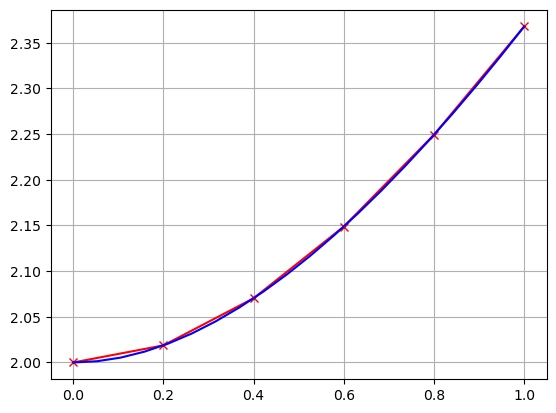

In [5]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x,y: x-y+2
x0 = 0.0
y0 = 2.0
N = 5

a = 0.0
b = 1.0
X = np.linspace(a,b,N+1)
print (X)
Y = [y0]

h = (b-a)/N
for n in range(len(X)-1):
    k1 = f(X[n], Y[n])
    k2 = f(X[n]+0.5*h, Y[n]+0.5*h*k1)
    k3 = f(X[n]+0.5*h, Y[n]+0.5*h*k2)
    
    k4 = f(X[n]+h, Y[n]+h*k3)
    Y.append(Y[n] + (h/6) * (k1 + 2*k2 + 2*k3 + k4))
    #print (k1,Y[-1])
print (np.round(Y,4))

# plota
plt.plot(X, Y, "xr-", Xe, Ye, "b-")
plt.grid()
plt.show()

Como já vimod, a biblioteca `scipy` implementa alguns algoritmos numéricos para soluções de PVIs em `solve_ivp`. Vamos usar para esse mesmo problema.

In [7]:
from scipy.integrate import solve_ivp

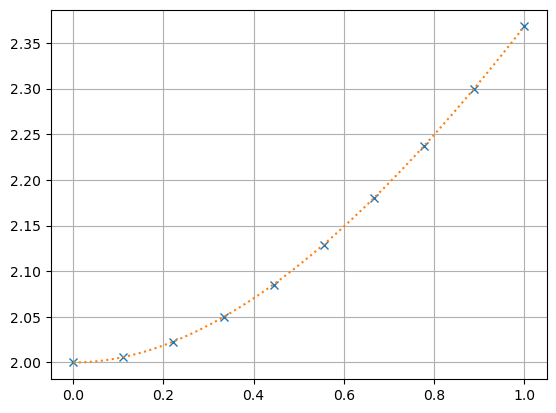

In [8]:
f = lambda x,y: x-y+2
sol = solve_ivp(f, [0, 1], [2],
                method="RK45", #Runge-Kutta method of order 5(4)
                t_eval = np.linspace(0,1,10))
plt.plot(sol.t, sol.y[0], 'x')


sol_ex = lambda x: np.exp(-x) + x + 1
te = np.linspace(0.0,1.0)
plt.plot(te,sol_ex(te),':')
plt.grid()
plt.show()

**Referências**

BOYCE, William E. Equações Diferenciais Elementares e Problemas de Valores de Contorno. Grupo GEN, 2020. E-book. ISBN 9788521637134. Disponível em: https://integrada.minhabiblioteca.com.br/#/books/9788521637134/. Acesso em: 19 mar. 2023.

KONG, Qingkai; SIAUW, Timmy; BAYEN, Alexandre M. Python Programming and Numerical Methods: A Guide For Engineers And Scientists. ed 1, Academic Press, 2021. DOI: https://doi.org/10.1016/C2018-0-04165-1. Disponível em:
https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html. Acesso em: 23 mar. 2023


LANGTANGEN, Hans Pette. A Primer on Scientific Programming with Python. Texts in Computational Science and Engineering. Springer Berlin, Heidelberg, ed 5, 2016. DOI: https://doi.org/10.1007/978-3-662-49887-3. Acesso em: 21 mar. 2023.

LEBL, Jiří. Differential Equations for Engineers. Amazon KDP edition, 2022. ISBN-13: 978-1-70623-023-6. Disponível em 
https://www.jirka.org/diffyqs/html/intfactor_section.html. Acesso em: 21 mar. 2023.

LYNCH, Stephen. Dynamical Systems with Applications Using Python. Birkhauser, 2018. http://www.doc.mmu.ac.uk/STAFF/S.Lynch/DSAP_Jupyter_Notebook.html

MARTINS, Ricardo Miranda. Tutorial rápido de Python para Matemáticos. IME-Unicamp, 2022. Disponível em: http://www.ime.unicamp.br/~rmiranda/code/python/python.html#Equa%C3%A7%C3%B5es-lineares-de-primeira-e-segunda-ordens. Acesso em: 21 mar. 2023.

https://www.sympy.org/scipy-2017-codegen-tutorial/notebooks/20-ordinary-differential-equations.html
